## Step 1: Read and Combine Data
1. **Read Files**: Load the data from each file in the `data` folder.
2. **Combine Data**: Concatenate all the data files into a single DataFrame or CSV file for easier analysis.


In [1]:
import pandas as pd
import os
import glob

# Define the folder containing the data files
folder_path = "C:/Users/HP/Desktop/Research Internship/Data2"

# Initialize a n empty list to hold DataFrames
dataframes = []

# Rename .csv to .CSV (if needed)
for file in glob.glob(f"{folder_path}/*.csv"):
    new_name = file[:-4] + ".CSV"
    os.rename(file, new_name)
    print(f"Renamed: {file} -> {new_name}")

# Iterate over all files in the data folder
for file_name in os.listdir(folder_path):
    print(f"Processing file: {file_name}")
    if file_name.endswith('.CSV'):  # Ensure it's a CSV file
        file_path = os.path.join(folder_path, file_name)
      
        # Extract the date from the file name (assuming ddmmyy is part of the name)
        date_part = file_name[:6]
        date = pd.to_datetime(date_part, format='%d%m%y').date()
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, on_bad_lines='skip')
        # Drop rows where ALL values are missing
        df.dropna(how='all', inplace=True)
        # Add a new column for the date
        df['Date'] = date
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Combine all DataFrames into a single DataFrame
data = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame
data.to_csv("C:/Users/HP/Desktop/Research Internship/combined_data.csv", index=False)
print("Data combined and saved as 'combined_data.csv'")


Renamed: C:/Users/HP/Desktop/Research Internship/Data2\010225.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\010225.CSV
Renamed: C:/Users/HP/Desktop/Research Internship/Data2\010425.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\010425.CSV
Renamed: C:/Users/HP/Desktop/Research Internship/Data2\020425.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\020425.CSV
Renamed: C:/Users/HP/Desktop/Research Internship/Data2\030225.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\030225.CSV
Renamed: C:/Users/HP/Desktop/Research Internship/Data2\030425.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\030425.CSV
Renamed: C:/Users/HP/Desktop/Research Internship/Data2\040225.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\040225.CSV
Renamed: C:/Users/HP/Desktop/Research Internship/Data2\040425.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\040425.CSV
Renamed: C:/Users/HP/Desktop/Research Internship/Data2\050225.CSV -> C:/Users/HP/Desktop/Research Internship/Data2\050

# Step 2: Explore and Preprocess Data
1. **Explore Data**: Analyze the combined data to understand its structure, distribution, and any patterns.
2. **Preprocess Data**: Clean and preprocess the data as needed (e.g., handle missing values, normalize features).

## 2.1 Data Analysis for Photovoltaic System

### 1. Attributes

- **Time**: The time at which the measurements were recorded (format: HH:MM).
- **Irradiance (W/m²)**: The power of solar radiation per unit area, measured in watts per square meter.
- **T1 to T8 (°C)**: Temperatures recorded at different points or sensors, measured in degrees Celsius.
- **TA (°C)**: Ambient temperature, representing the surrounding environmental temperature.
- **Humidity (%)**: The relative humidity of the air, given as a percentage.
- **V1 to V8 (V)**: Voltage readings from different points or sensors, measured in volts.
- **PV_Current (A)**: The current generated by the photovoltaic (PV) system, measured in amperes.
- **AC Voltage (V)**: The alternating current (AC) voltage, measured in volts.
- **AC Current (A)**: The alternating current (AC) current, measured in amperes.
- **AC Power (W)**: The power output of the AC system, measured in watts.

### 2. Check for Data Validity and Units

We'll check if the time values and other data entries are correct and ensure that each attribute has the proper unit label in the dataset.

### 3. Analyze Relationships Between Attributes

To explore how each attribute relates to others, we can use graphs to visualize these relationships. We will look at correlations such as:
- **Time vs. Irradiance**: To see if there's a pattern of solar radiation over time.
- **Irradiance vs. PV Current**: To understand how irradiance affects the current generated.
- **Temperature vs. Voltage**: To observe any dependencies of voltage on temperature.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the combined data
data = pd.read_csv('combined_data.csv')

# Check for missing values and correct data types
print("Data Info:")
print(data.info())
data.dropna(how='all', inplace=True)

# Ensure the Time column is in the correct datetime format
try:
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.time
except Exception as e:
    print(f"Error in time conversion: {e}")

# Rename columns with appropriate units
columns_with_units = {
    'Irridance': 'Irradiance (W/m²)',
    'TA': 'TA (°C)',
    'Humidity': 'Humidity (%)',
    'PV_Current': 'PV_Current (A)',
    'AC_Voltage': 'AC Voltage (V)',
    'AC Current': 'AC Current (A)',
    'AC Power': 'AC Power (W)',
}
for i in range(1, 9):
    columns_with_units[f'T{i}'] = f'T{i} (°C)'
    columns_with_units[f'V{i}'] = f'V{i} (V)'

data.rename(columns=columns_with_units, inplace=True)

# Print the first few rows to verify
print("Data Sample:")
print(data.head())

# Define the column multipliers
multipliers = {
    "Irradiance (W/m²)": 1,  # No change
    "T1 (°C)": 0.1,
    "T2 (°C)": 0.1,
    "T3 (°C)": 0.1,
    "T4 (°C)": 0.1,
    "T5 (°C)": 0.1,
    "T6 (°C)": 0.1,
    "T7 (°C)": 0.1,
    "T8 (°C)": 0.1,
    "TA (°C)": 0.1,
    "Humidity (%)":0.1,
    "V1 (V)": 0.01,
    "V2 (V)": 0.01,
    "V3 (V)": 0.01,
    "V4 (V)": 0.01,
    "V5 (V)": 0.01,
    "V6 (V)": 0.01,
    "V7 (V)": 0.01,
    "V8 (V)": 0.01,
    "PV_Current (A)": 0.01,
    "AC Voltage (V)": 0.01,
    "AC Current (A)": 0.001,
    "AC Power (W)": 0.1,  
}

# Apply adjustments to data
for column, multiplier in multipliers.items():
    if column in data.columns:
        data[column] *= multiplier
print(data.head())     


# Save the adjusted data to a new file
adjusted_output_file = "adjusted_combined_data.csv"
data.to_csv(adjusted_output_file, index=False)
print(f"Adjusted data saved to {adjusted_output_file}")


C:\Users\HP\AppData\Local\Temp\ipykernel_14148\2763988308.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('combined_data.csv')


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35569 entries, 0 to 35568
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time                            35412 non-null  object 
 1   Irridance                       35412 non-null  float64
 2   T1                              35412 non-null  float64
 3   T2                              35412 non-null  float64
 4   T3                              35412 non-null  float64
 5   T4                              35412 non-null  float64
 6   T5                              35412 non-null  float64
 7   T6                              35412 non-null  float64
 8   T7                              35412 non-null  float64
 9   T8                              35412 non-null  float64
 10  TA                              35412 non-null  float64
 11  Humidity                        35412 non-null  float64
 12  V1                   

# **Step 4: Load and Explore the Dataset**
## Run this in Python to check data quality:

In [16]:
import pandas as pd

# Load dataset
df = pd.read_csv("adjusted_combined_data.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check basic statistics
print(df.describe())
print("Columns in DataFrame:", data.columns.tolist())

       Time  Irradiance (W/m²)  T1 (°C)  T2 (°C)  T3 (°C)  T4 (°C)  T5 (°C)  \
0  10:18:00              445.0     45.1     46.0     46.1     45.0     43.5   
1  10:19:00              451.0     45.2     46.1     46.3     45.0     43.8   
2  10:20:00              448.0     44.8     46.1     46.1     44.8     43.4   
3  10:21:00              436.0     44.8     45.9     45.9     44.7     43.3   
4  10:22:00              453.0     44.6     45.6     45.8     44.4     43.3   

   T6 (°C)  T7 (°C)  T8 (°C)  ...  V7 (V)  V8 (V)  PV_Current (A)  \
0     44.5     45.0     45.6  ...   40.39   39.83            0.02   
1     44.8     45.0     45.8  ...   36.92   36.62            2.75   
2     44.5     44.9     45.5  ...   33.56   33.66            4.52   
3     44.6     44.9     45.6  ...   33.86   33.92            4.34   
4     44.4     44.6     45.4  ...   33.63   33.77            4.58   

   AC Voltage (V)  AC Current (A)  AC Power (W)        Date  \
0          231.48           0.304           9.4

# **Plotting Irradiance vs AC Power**

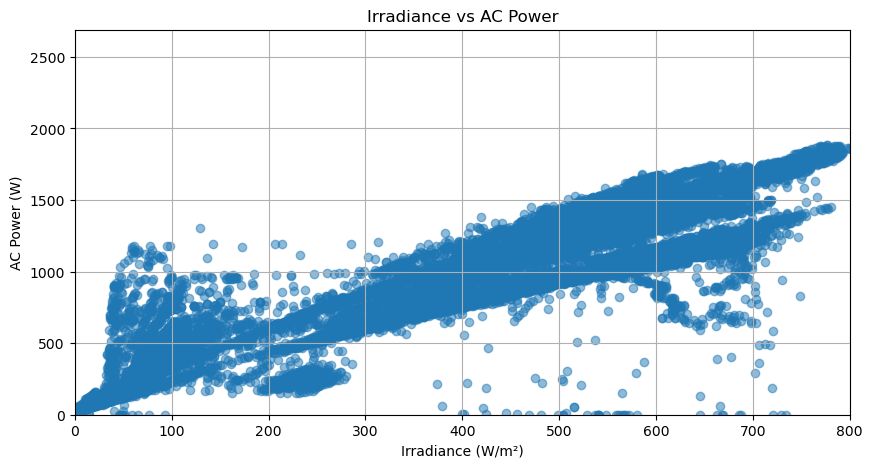

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(data['Irradiance (W/m²)'], data['AC Power (W)'], alpha=0.5)
plt.xlabel('Irradiance (W/m²)')
plt.ylabel('AC Power (W)')
plt.title('Irradiance vs AC Power')
plt.xlim(0, 800)    # 🔹 Set x-axis limit
plt.ylim(0, 2690)   # 🔹 Set y-axis limit
plt.grid(True)
plt.show()


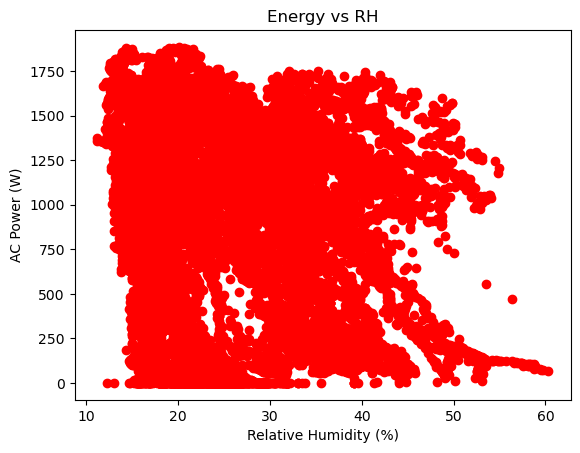

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Clean the data by removing extreme values
df_clean = df[(df["Humidity (%)"] >= 0) & (df["Humidity (%)"] <= 100) &
              (df["AC Power (W)"] >= 0) & (df["AC Power (W)"] <= 2000)]

# Extract the clean columns for plotting
humidity = df_clean["Humidity (%)"]
energy = df_clean["AC Power (W)"]

# Scatter plot
plt.scatter(humidity, energy, color='red')

# Set labels and title
plt.xlabel("Relative Humidity (%)")
plt.ylabel("AC Power (W)")
plt.title("Energy vs RH")

# Show the plot
plt.show()


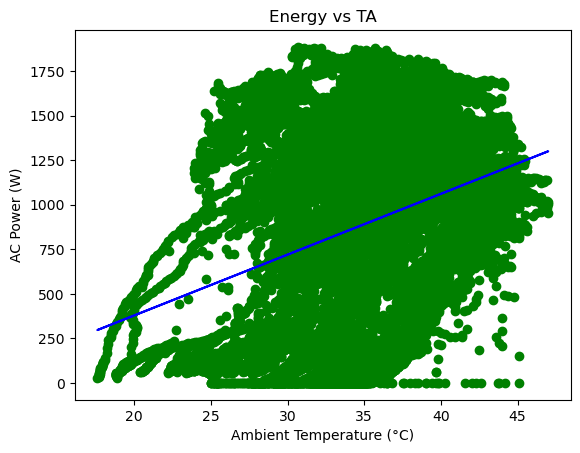

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("adjusted_combined_data.csv")  # Change this to your actual dataset file

# Clean the data by removing extreme values
df_clean = df[(df["TA (°C)"] >= 0) & (df["TA (°C)"] <= 50) &  
              (df["AC Power (W)"] >= 0) & (df["AC Power (W)"] <= 2000)]

# Extract the clean columns for plotting
temperature = df_clean["TA (°C)"]
energy = df_clean["AC Power (W)"]

# Scatter plot
plt.scatter(temperature, energy, color='green')

# Fit a linear trend line (line of best fit)
z = np.polyfit(temperature, energy, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(temperature, p(temperature), color='blue')

# Set labels and title
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("AC Power (W)")
plt.title("Energy vs TA")

# Show the plot
plt.show()


# **Step 5: Linear Regression Model Training**
## Model is trained on the dataset

Mean Squared Error (MSE): 54521.35
Root Mean Squared Error (RMSE): 233.50
Mean Absolute Error (MAE): 142.50
R² Score: 0.8402


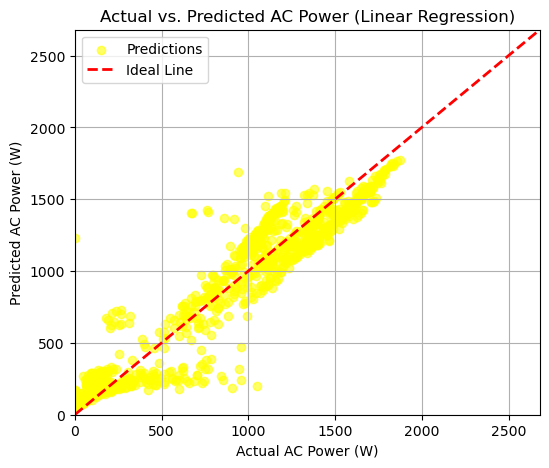

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import Imputer
import numpy as np
import matplotlib.pyplot as plt

# Drop rows with missing values in essential columns
df_clean = df.dropna(subset=["Irradiance (W/m²)", "TA (°C)", "Humidity (%)", "AC Power (W)"])

# Select features and target
X = df_clean[['Irradiance (W/m²)', 'TA (°C)', 'Humidity (%)']].values
y = df_clean['AC Power (W)'].values

# **Split data first**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# **Handle missing values with Imputer**
imputer = SimpleImputer(strategy="mean")  # Replace NaNs with column mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# **Scale features**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# **Calculate performance metrics**
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# **Print performance metrics**
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# **Plot predictions vs. actual values**
plt.figure(figsize=(6, 5))
plt.ylim(0, 2680)  # Set Y-axis range
plt.xlim(0, 2680)  # Set X-axis range
plt.scatter(y_test, y_pred, color="yellow", alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Ideal Line")  # Ideal line
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Predicted AC Power (W)")
plt.title("Actual vs. Predicted AC Power (Linear Regression)")
plt.legend()
plt.grid()
plt.show()


# **Using curve fitting**
# Equation

Regression Coefficients:
Humidity (%): -13.7766
TA (°C): -32.8492
Irradiance (W/m²): 5.3282
Humidity^2: 0.0533
TA^2: 0.5927
Irradiance^2: 0.0002
Humidity_TA: 0.3342
Humidity_Irradiance: -0.0118
TA_Irradiance: -0.0881

Intercept: 577.7305
Mean Squared Error: 52955.45
R² Score: 0.8434


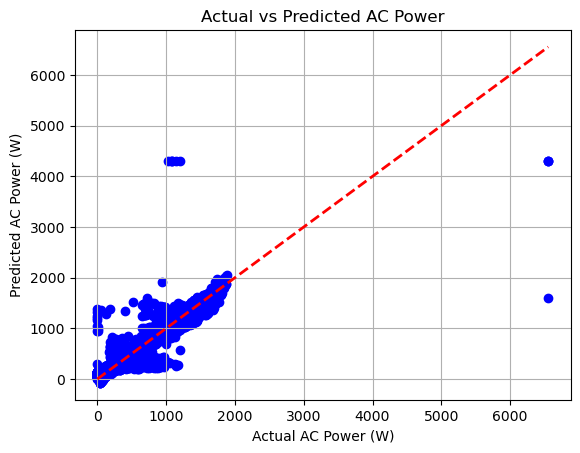

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Load dataset (replace 'data.csv' with your file)
df = pd.read_csv("adjusted_combined_data.csv")
X = X.copy()  # Add this line before transformations

# Step 2: Drop missing values and select features
df_clean = df.dropna(subset=["Humidity (%)", "TA (°C)", "Irradiance (W/m²)", "AC Power (W)"])
X = df_clean[["Humidity (%)", "TA (°C)", "Irradiance (W/m²)"]].copy()  # Fixed line
y = df_clean["AC Power (W)"]

# Optional: Create non-linear terms (log, squared terms)
X.loc[:,"Humidity^2"] = X["Humidity (%)"] ** 2
X.loc[:,"TA^2"] = X["TA (°C)"] ** 2
X.loc[:,"Irradiance^2"] = X["Irradiance (W/m²)"] ** 2
X.loc[:,"Humidity_TA"] = X["Humidity (%)"] * X["TA (°C)"]
X.loc[:,"Humidity_Irradiance"] = X["Humidity (%)"] * X["Irradiance (W/m²)"]
X.loc[:,"TA_Irradiance"] = X["TA (°C)"] * X["Irradiance (W/m²)"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Output results
print("Regression Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Optional: Plot actual vs predicted
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Predicted AC Power (W)")
plt.title("Actual vs Predicted AC Power")
plt.grid()
plt.show()


# **Outlier Removal**

Removed 656 outliers.
Mean Squared Error (MSE): 26937.00
Root Mean Squared Error (RMSE): 164.12
Mean Absolute Error (MAE): 116.13
R² Score: 0.9089


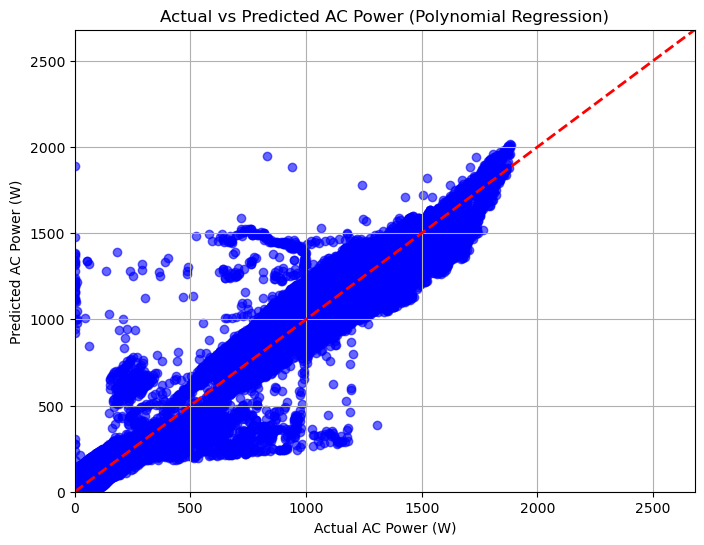

Derived Relationship:
AC Power (W) = 278.88 + (0.0000 * 1) + (-17.5762 * x0) + (-7.5565 * x1) + (5.0014 * x2) + (0.1275 * x0^2) + (0.2889 * x0 x1) + (-0.0099 * x0 x2) + (0.1766 * x1^2) + (-0.0776 * x1 x2) + (0.0001 * x2^2) 


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Load and clean data
df_clean = df.dropna(subset=["Humidity (%)", "TA (°C)", "Irradiance (W/m²)", "AC Power (W)"])

# Prepare input features
X = df_clean[["Humidity (%)", "TA (°C)", "Irradiance (W/m²)"]].copy()
y = df_clean["AC Power (W)"].values

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Non-Linear Terms
X["Humidity"] = X["Humidity (%)"]
X["TA"] = X["TA (°C)"]
X["Irradiance"] = X["Irradiance (W/m²)"]
X.loc[:, "Humidity^2"] = X["Humidity (%)"] ** 2
X.loc[:, "TA^2"] = X["TA (°C)"] ** 2
X.loc[:, "Irradiance^2"] = X["Irradiance (W/m²)"] ** 2
X.loc[:, "Humidity_TA"] = X["Humidity (%)"] * X["TA (°C)"]
X.loc[:, "Humidity_Irradiance"] = X["Humidity (%)"] * X["Irradiance (W/m²)"]
X.loc[:, "TA_Irradiance"] = X["TA (°C)"] * X["Irradiance (W/m²)"]

# Detect outliers using z-score
z_scores = np.abs(zscore(np.column_stack((X, y))))
outlier_threshold = 3
outlier_indices = np.where(z_scores > outlier_threshold)[0]
df_filtered = df_clean.drop(df_clean.index[outlier_indices])
print(f"Removed {len(outlier_indices)} outliers.")

# Prepare filtered features
X_filtered = df_filtered[["Humidity (%)", "TA (°C)", "Irradiance (W/m²)"]].values
y_filtered = df_filtered["AC Power (W)"].values

# Polynomial Regression with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_filtered)

# Train Model
model = LinearRegression()
model.fit(X_poly, y_filtered)
y_pred = model.predict(X_poly)

# Evaluate Model
mse = mean_squared_error(y_filtered, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_filtered, y_pred)
r2 = r2_score(y_filtered, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_filtered, y_pred, color="blue", alpha=0.6)
plt.plot([0, 2680], [0, 2680], "r--", linewidth=2)  # Diagonal reference line
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Predicted AC Power (W)")
plt.title("Actual vs Predicted AC Power (Polynomial Regression)")
plt.xlim(0, 2680)
plt.ylim(0, 2680)
plt.grid()
plt.show()

# Print Derived Relationship
coefs = model.coef_
intercept = model.intercept_
print("Derived Relationship:")
equation = f"AC Power (W) = {intercept:.2f} "
features = poly.get_feature_names_out()
for coef, feature in zip(coefs, features):
    equation += f"+ ({coef:.4f} * {feature}) "
print(equation)


# Regression Model development

# **Implementing KNN Model**

KNN (k=2) -> MSE: 41993.97, R²: 0.8758
KNN (k=5) -> MSE: 40001.38, R²: 0.8817
KNN (k=10) -> MSE: 48529.06, R²: 0.8565
KNN (k=15) -> MSE: 50991.18, R²: 0.8492
KNN (k=20) -> MSE: 47943.09, R²: 0.8582
KNN (k=25) -> MSE: 46676.15, R²: 0.8620
KNN (k=30) -> MSE: 47245.08, R²: 0.8603


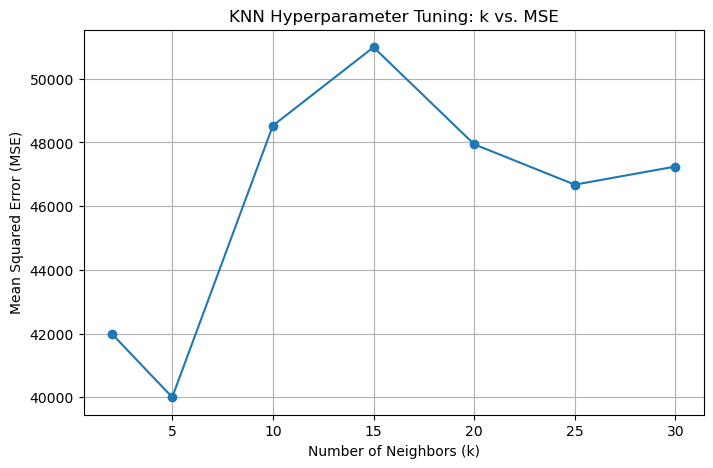

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a range of neighbor values to test
neighbor_values = [2, 5, 10, 15, 20, 25, 30]

mse_values = []
r2_values = []

# Loop through different values of k (n_neighbors)
for k in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_knn)
    r2 = r2_score(y_test, y_pred_knn)

    mse_values.append(mse)
    r2_values.append(r2)

    print(f"KNN (k={k}) -> MSE: {mse:.2f}, R²: {r2:.4f}")

# Plot MSE vs. n_neighbors
plt.figure(figsize=(8, 5))
plt.plot(neighbor_values, mse_values, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Hyperparameter Tuning: k vs. MSE")
plt.grid()
plt.show()


## **KNN Model**

KNN Mean Squared Error: 34304.34940607235
KNN Root Mean Squared Error (RMSE): 185.21433369497177
KNN Mean Absolute Error (MAE): 52.6656007751938
KNN R² Score: 0.8994835364902072


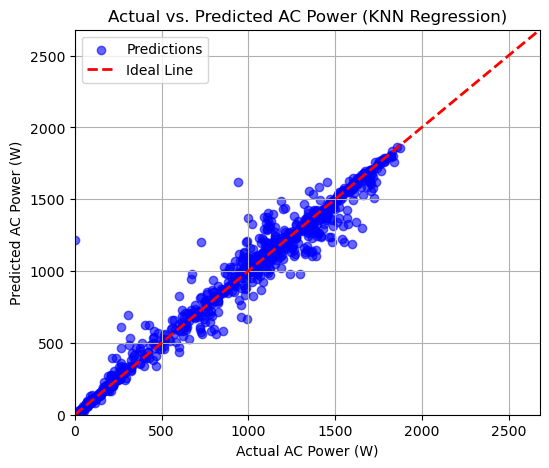

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train-test split (ensuring consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Apply StandardScaler only on X (features), not y (target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_test to a Pandas Series with correct indexing
y_test = pd.Series(y_test, index=range(len(y_test)))

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=15)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_knn_pred = knn_model.predict(X_test_scaled)

# Store results in a DataFrame and save to CSV
df_results = pd.DataFrame({
    "Index": y_test.index,  # Corrected index reference
    "Actual": y_test.to_numpy(),  # Ensures consistency
    "Predicted": y_knn_pred  # Directly use y_knn_pred
})
df_results.to_csv("knn_predictions.csv", index=False)

# Evaluate model
mse = mean_squared_error(y_test, y_knn_pred)
r2 = r2_score(y_test, y_knn_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_knn_pred)

print("KNN Mean Squared Error:", mse)
print("KNN Root Mean Squared Error (RMSE):", rmse)
print("KNN Mean Absolute Error (MAE):", mae)
print("KNN R² Score:", r2)

# **Plot Actual vs. Predicted Values**
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_knn_pred, color="blue", alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Ideal Line")
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Predicted AC Power (W)")
plt.title("Actual vs. Predicted AC Power (KNN Regression)")
plt.legend()
plt.grid()
plt.ylim(0, 2680)
plt.xlim(0, 2680)
plt.show()


## **Random Forest Regression**

Random Forest Mean Squared Error (MSE): 7965.999846439805
Random Forest Root Mean Squared Error (RMSE): 89.25245008648113
Random Forest Mean Absolute Error (MAE): 39.55821917988846
Random Forest R² Score: 0.9746185534661334


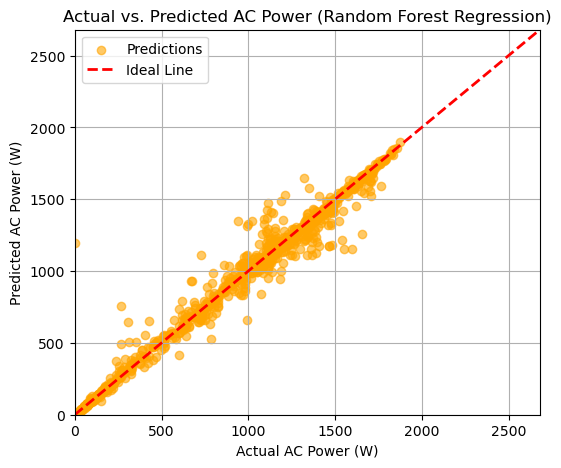

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataset
df_clean = df.dropna(subset=["Irradiance (W/m²)", "TA (°C)", "Humidity (%)", "AC Power (W)"])

# **IQR Calculation**
Q1 = df_clean[['Irradiance (W/m²)', 'TA (°C)', 'Humidity (%)', 'AC Power (W)']].quantile(0.25)
Q3 = df_clean[['Irradiance (W/m²)', 'TA (°C)', 'Humidity (%)', 'AC Power (W)']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# **Clip values instead of removing them**
df_filtered = df_clean.copy()
df_filtered[['Irradiance (W/m²)', 'TA (°C)', 'Humidity (%)', 'AC Power (W)']] = df_filtered[
    ['Irradiance (W/m²)', 'TA (°C)', 'Humidity (%)', 'AC Power (W)']
].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Define features and target variable
feature_names = ["Irradiance (W/m²)", "TA (°C)", "Humidity (%)"]

X = df_filtered[feature_names].values
y = df_filtered['AC Power (W)'].values

# **Fix: Split data BEFORE converting y_test to Pandas Series**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# **Convert y_test to Pandas Series with default index**
y_test = pd.Series(y_test)  # ✅ Fix applied here

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Random Forest on Polynomial Features
rfr_poly = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
rfr_poly.fit(X_train_poly, y_train)

# Make Predictions
y_pred_poly = rfr_poly.predict(X_test_poly)

# **Fix: Use y_test (Series) instead of NumPy array in DataFrame**
df_results = pd.DataFrame({
    "Index": y_test.index,  # ✅ Now valid because y_test is a Pandas Series
    "Actual": y_test,       # ✅ Directly store Series
    "Predicted": y_pred_poly  # ✅ Corrected prediction variable
})

# Save results to CSV
df_results.to_csv("rfr_predictions.csv", index=False)

# **Evaluate Model**
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# **Print Model Performance**
print("Random Forest Mean Squared Error (MSE):", mse_poly)
print("Random Forest Root Mean Squared Error (RMSE):", rmse)
print("Random Forest Mean Absolute Error (MAE):", mae)
print("Random Forest R² Score:", r2_poly)

# **Plot Actual vs. Predicted Values**
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_poly, color="orange", alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Ideal Line")
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Predicted AC Power (W)")
plt.title("Actual vs. Predicted AC Power (Random Forest Regression)")
plt.legend()
plt.grid()
plt.ylim(0, 2680)
plt.xlim(0, 2680)
plt.show()


In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
df = pd.read_csv("adjusted_combined_data.csv")  # Change to your file name

# Select only the required features
features = ["Irradiance (W/m²)", "Humidity (%)", "TA (°C)"]
target = "AC Power (W)"

# Drop missing values
df = df.dropna(subset=features + [target])

# Extract X (features) and y (target)
X = df[features]
y = df[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (95-5)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

# **Ensure y_test is a Pandas Series with a proper index**
y_test = y_test.reset_index(drop=True)  # ✅ Fix applied here

# Build ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # Output layer (Regression)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test).flatten()  # Get model predictions
y_pred = pd.Series(y_pred, index=y_test.index)  # ✅ Assign index correctly

# Store results in a DataFrame
df_results = pd.DataFrame({"Index": y_test.index, "Actual": y_test.to_numpy(), "Predicted": y_pred.to_numpy()})
df_results.to_csv("ann_predictions.csv", index=False) 

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"ANN Mean Squared Error (MSE): {mse}")
print(f"ANN Root Mean Squared Error (RMSE): {rmse}")
print(f"ANN Mean Absolute Error (MAE): {mae}")
print(f"ANN R² Score: {r2}")


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 543871.2500 - val_loss: 52589.0859
Epoch 2/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 58216.7617 - val_loss: 49418.9688
Epoch 3/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 51580.5312 - val_loss: 49049.8203
Epoch 4/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 49080.0469 - val_loss: 47999.5742
Epoch 5/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 50280.7578 - val_loss: 46789.7031
Epoch 6/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 51617.5742 - val_loss: 46691.0742
Epoch 7/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 46739.1797 - val_loss: 47553.2031
Epoch 8/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 44464.8672 - val_loss: 46784.2891
Epoch 9/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 47136.5703 - val_loss: 47643.9375
Epoch 10/30
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 47755.1875 - val_loss: 46385.4102
Epoch 11/30
1225/1225 ━━━━━━━━━━━━━━

## **Model Combinations**

Stacking Regressor Mean Squared Error (MSE): 3481.1718774377496
Stacking Regressor Root Mean Squared Error (RMSE): 59.00145657047587
Stacking Regressor Mean Absolute Error (MAE): 33.11873752637157
Stacking Regressor R² Score: 0.9889082124547272


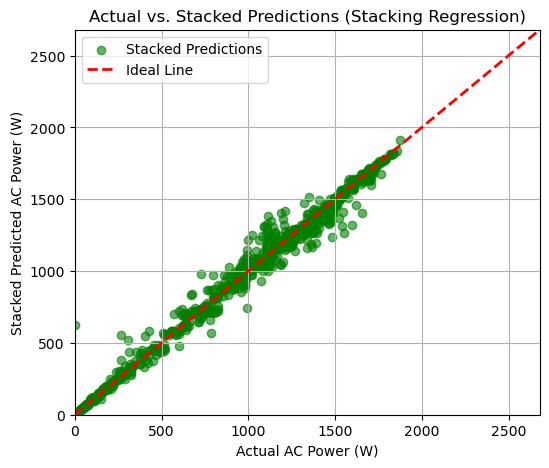

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load Predictions
rfr_results = pd.read_csv("rfr_predictions.csv")
knn_results = pd.read_csv("knn_predictions.csv")
ann_results = pd.read_csv("ann_predictions.csv")

knn_results["Actual"] = rfr_results["Actual"]
ann_results["Actual"] = rfr_results["Actual"]

# Sort by Index for Consistency
rfr_results = rfr_results.sort_values(by="Index").reset_index(drop=True)
knn_results = knn_results.sort_values(by="Index").reset_index(drop=True)
ann_results = ann_results.sort_values(by="Index").reset_index(drop=True)

# Drop Index Column for Stacking
rfr_results = rfr_results.drop(columns=["Index"])
knn_results = knn_results.drop(columns=["Index"])
ann_results = ann_results.drop(columns=["Index"])

# Ensure all datasets have the same actual values
if not (rfr_results["Actual"].equals(knn_results["Actual"]) and rfr_results["Actual"].equals(ann_results["Actual"])):
    raise ValueError("Mismatch in actual values even after sorting!")

# Combine predictions
stacked_data = pd.DataFrame({
    "Actual": rfr_results["Actual"],
    "RFR_Pred": rfr_results["Predicted"],
    "KNN_Pred": knn_results["Predicted"],
    "ANN_Pred": ann_results["Predicted"]
})

# Define input (X) and target (y)
X_stacking = stacked_data[["RFR_Pred", "KNN_Pred", "ANN_Pred"]]
y_stacking = stacked_data["Actual"]

# Train Stacking Regressor (Meta-Model)
# Train Stacking Regressor (Meta-Model) using Gradient Boosting
meta_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
meta_model.fit(X_stacking, y_stacking)


# Make Final Predictions
stacked_predictions = meta_model.predict(X_stacking)

# Evaluate Model
mse = mean_squared_error(y_stacking, stacked_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_stacking, stacked_predictions)
r2 = r2_score(y_stacking, stacked_predictions)

print("Stacking Regressor Mean Squared Error (MSE):", mse)
print("Stacking Regressor Root Mean Squared Error (RMSE):", rmse)
print("Stacking Regressor Mean Absolute Error (MAE):", mae)
print("Stacking Regressor R² Score:", r2)

# Save Final Stacking Predictions to CSV
df_stacked_results = pd.DataFrame({"Actual": y_stacking, "Stacked_Predicted": stacked_predictions})
df_stacked_results.to_csv("stacking_predictions.csv", index=False)

# **Plot Actual vs. Stacked Predictions**
plt.figure(figsize=(6, 5))
plt.scatter(y_stacking, stacked_predictions, color="green", alpha=0.6, label="Stacked Predictions")
plt.plot([y_stacking.min(), y_stacking.max()], [y_stacking.min(), y_stacking.max()], 'r--', linewidth=2, label="Ideal Line")
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Stacked Predicted AC Power (W)")
plt.title("Actual vs. Stacked Predictions (Stacking Regression)")
plt.legend()
plt.grid()
plt.ylim(0, 2680)
plt.xlim(0, 2680)
plt.show()

## **Multiple Linear Regression**

🔹 Mean Squared Error (MSE): 34356.60
🔹 Root Mean Squared Error (RMSE): 185.36
🔹 Mean Absolute Error (MAE): 137.48
🔹 R² Score: 0.8882


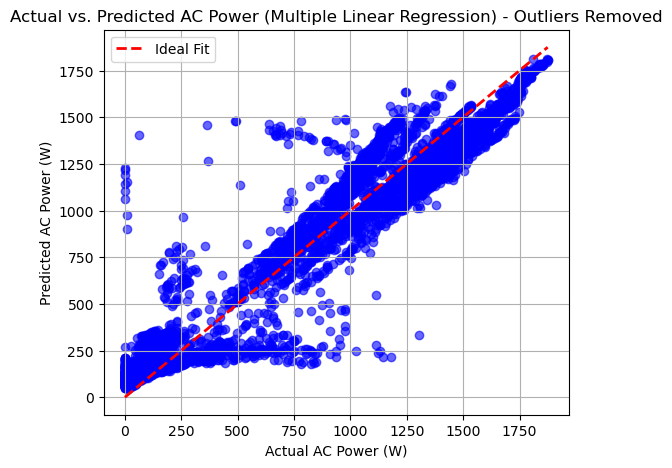


🔹 Model Coefficients: [ 644.41618529 -293.01534666  -80.35729261]
🔹 Model Intercept: 882.6010259834874


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 🔹 Load Dataset
df = pd.read_csv(r"C:/Users/HP/Desktop/Research Internship/adjusted_combined_data.csv")  # Use raw string for path

# 🔹 Drop rows with missing values in required columns
df_clean = df.dropna(subset=["Irradiance (W/m²)", "TA (°C)", "Humidity (%)", "AC Power (W)"]).reset_index(drop=True)

# 🔹 Remove Outliers using IQR method (on target variable AC Power)
Q1 = df_clean["AC Power (W)"].quantile(0.25)
Q3 = df_clean["AC Power (W)"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme values
df_filtered = df_clean[(df_clean["AC Power (W)"] >= lower_bound) & (df_clean["AC Power (W)"] <= upper_bound)]

# 🔹 Select features and target variable
X = df_filtered[['Irradiance (W/m²)', 'TA (°C)', 'Humidity (%)']].values
y = df_filtered['AC Power (W)'].values

# 🔹 Split Data into Train & Test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Train Multiple Linear Regression Model
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

# 🔹 Predict on Test Data
y_pred = mlr_model.predict(X_test_scaled)

# 🔹 Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 R² Score: {r2:.4f}")

# 🔹 Plot Actual vs. Predicted AC Power
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Ideal Fit")
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Predicted AC Power (W)")
plt.title("Actual vs. Predicted AC Power (Multiple Linear Regression) - Outliers Removed")
plt.legend()
plt.grid()
plt.show()

# 🔹 Print Coefficients & Intercept
print("\n🔹 Model Coefficients:", mlr_model.coef_)
print("🔹 Model Intercept:", mlr_model.intercept_)


🔹 Mean Squared Error (MSE): 61013.19
🔹 Root Mean Squared Error (RMSE): 247.01
🔹 Mean Absolute Error (MAE): 146.28
🔹 R² Score: 0.8196


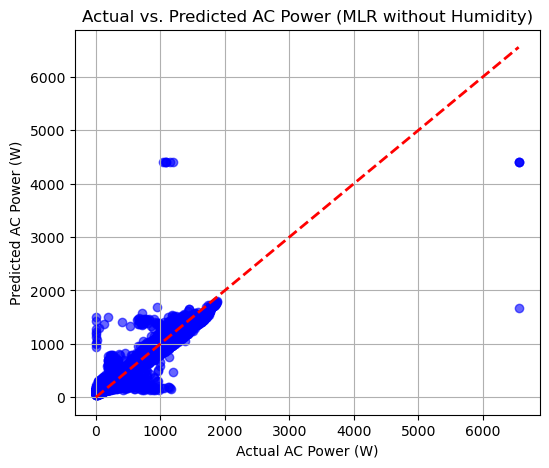


🔹 Model Coefficients: [ 781.73573687 -394.49931686]
🔹 Model Intercept: 895.1289507183108


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 🔹 Load Dataset
df = pd.read_csv("C:/Users/HP/Desktop/Research Internship/adjusted_combined_data.csv")  # Replace with actual path

# 🔹 Drop NaN values for relevant columns
df_clean = df.dropna(subset=["Irradiance (W/m²)", "TA (°C)", "AC Power (W)"])

# 🔹 Select features (Dropping Humidity)
X = df_clean[['Irradiance (W/m²)', 'TA (°C)']].values  # Only two features now
y = df_clean['AC Power (W)'].values

# 🔹 Split Data into Train & Test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize Features (Scaling is recommended for regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Train Multiple Linear Regression Model
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

# 🔹 Predict on Test Data
y_pred = mlr_model.predict(X_test_scaled)

# 🔹 Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 R² Score: {r2:.4f}")

# 🔹 Plot Actual vs. Predicted AC Power
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Ideal Line
plt.xlabel("Actual AC Power (W)")
plt.ylabel("Predicted AC Power (W)")
plt.title("Actual vs. Predicted AC Power (MLR without Humidity)")
plt.grid()
plt.show()

# 🔹 Print Coefficients & Intercept
print("\n🔹 Model Coefficients:", mlr_model.coef_)
print("🔹 Model Intercept:", mlr_model.intercept_)


                   Irradiance (W/m²)   TA (°C)  Humidity (%)  AC Power (W)
Irradiance (W/m²)           1.000000  0.766718      0.625232      0.801402
TA (°C)                     0.766718  1.000000      0.878160      0.332740
Humidity (%)                0.625232  0.878160      1.000000      0.205013
AC Power (W)                0.801402  0.332740      0.205013      1.000000


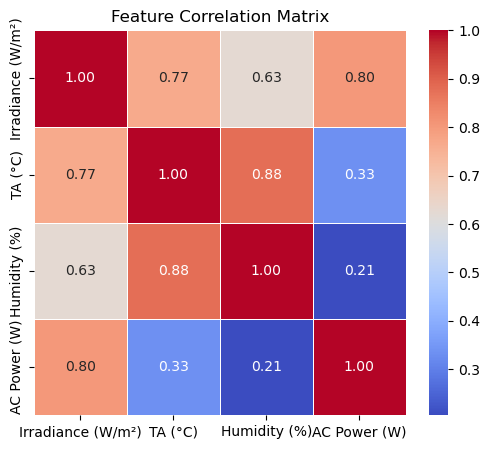

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Load Dataset
df = pd.read_csv("C:/Users/HP/Desktop/Research Internship/adjusted_combined_data.csv")

# 🔹 Select Relevant Features
features = ["Irradiance (W/m²)", "TA (°C)", "Humidity (%)", "AC Power (W)"]

# 🔹 Compute Correlation Matrix
corr_matrix = df[features].corr()

# 🔹 Print Correlation Matrix
print(corr_matrix)

# 🔹 Plot Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Set Title
plt.title("Feature Correlation Matrix")

# 🔹 Show Plot
plt.show()


## **Classification**

       Time  Irradiance (W/m²)  T1 (°C)  T2 (°C)  T3 (°C)  T4 (°C)  T5 (°C)  \
0  10:18:00                445     45.1     46.0     46.1     45.0     43.5   
1  10:19:00                451     45.2     46.1     46.3     45.0     43.8   
2  10:20:00                448     44.8     46.1     46.1     44.8     43.4   
3  10:21:00                436     44.8     45.9     45.9     44.7     43.3   
4  10:22:00                453     44.6     45.6     45.8     44.4     43.3   

   T6 (°C)  T7 (°C)  T8 (°C)  ...  V5 (V)  V6 (V)  V7 (V)  V8 (V)  \
0     44.5     45.0     45.6  ...   40.37   39.81   40.39   39.83   
1     44.8     45.0     45.8  ...   37.17   36.49   36.92   36.62   
2     44.5     44.9     45.5  ...   34.13   33.41   33.56   33.66   
3     44.6     44.9     45.6  ...   34.38   33.64   33.86   33.92   
4     44.4     44.6     45.4  ...   34.21   33.47   33.63   33.77   

   PV_Current (A)  AC Voltage (V)  AC Current (A)  AC Power (W)        Date  \
0            0.02          231.

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\470571348.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nProportion of Normal State:", class_counts.get(0, 0) / len(df) * 100, "%")
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\470571348.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Proportion of Faulty Condition:", class_counts.get(1, 0) / len(df) * 100, "%")


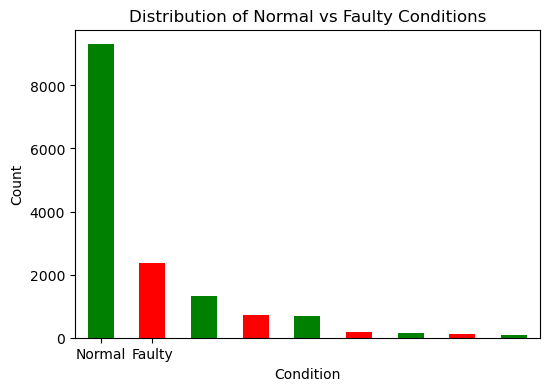

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\HP\Desktop\Research Internship\labelled_adjusted_combined_data.csv"
df = pd.read_csv(file_path)

# Check the first few rows to confirm successful loading
print(df.head())

# Count occurrences of each class (assuming the label column is named 'Label')
class_counts = df['Status'].value_counts()

# Print proportions
print("Class Distribution:")
print(class_counts)
print("\nProportion of Normal State:", class_counts.get(0, 0) / len(df) * 100, "%")
print("Proportion of Faulty Condition:", class_counts.get(1, 0) / len(df) * 100, "%")

# Plot a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel("Condition")
plt.ylabel("Count")
plt.title("Distribution of Normal vs Faulty Conditions")
plt.xticks(ticks=[0, 1], labels=["Normal", "Faulty"], rotation=0)
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have the predictions from ANN, RFR, and KNN
pred_ann = np.array([...])  # ANN predictions
pred_rfr = np.array([...])  # RFR predictions
pred_knn = np.array([...])  # KNN predictions
y_actual = np.array([...])  # Actual target values

# Combine predictions as features
X_meta = np.column_stack((pred_ann, pred_rfr, pred_knn))

# Train the meta-model (Using Linear Regression for simplicity)
meta_model = LinearRegression()
meta_model.fit(X_meta, y_actual)

# Final predictions from the stacked model
final_pred = meta_model.predict(X_meta)

# Evaluate the performance of the stacked model
mse = mean_squared_error(y_actual, final_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, final_pred)
r2 = r2_score(y_actual, final_pred)

print(f"Stacked Model Mean Squared Error (MSE): {mse}")
print(f"Stacked Model Root Mean Squared Error (RMSE): {rmse}")
print(f"Stacked Model Mean Absolute Error (MAE): {mae}")
print(f"Stacked Model R² Score: {r2}")


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = pd.read_csv("C:/Users/HP/Downloads/fault_labelled_data_24March.csv")

# Preprocessing
# ... (handle missing values, outliers, feature selection, etc.)
data_cleaned = data.dropna()
print(data_cleaned)

# Separate features (X) and labels (y)
X = data_cleaned.drop("fault_label", axis=1)
y = data_cleaned["fault_label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5) # Choose K=5
# knn.fit(X_train_scaled, y_train)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

       Irradiance (W/m¬≤)  TA (¬∞C)  Humidity (%)  V1 (V)  PV_Current (A)  \
0                     489      30.7          45.5   38.63            2.51   
1                     487      30.8          45.2   34.04            5.25   
2                     491      31.1          44.7   33.69            5.30   
3                     496      31.3          44.3   33.19            5.51   
4                     499      31.5          44.2   32.99            5.56   
...                   ...       ...           ...     ...             ...   
14584                 332      32.7          34.0    9.52            3.49   
14585                 325      32.7          34.3    9.68            3.40   
14586                 322      32.6          34.1    9.57            3.38   
14587                 319      32.6          34.0    9.73            3.26   
14588                 324      32.6          34.0    9.89            3.43   

          power fault_label  
0       96.9613      normal  
1      178.7100

#### 